## Data Exploration

In [1]:
# imports

import numpy as np
import pandas as pd

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import seaborn as sns

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
PATH_PREFIX = "./data/"

all_texts_paths = [[PATH_PREFIX+"Murakami_Wood.txt", 11],
                   [PATH_PREFIX+"Murakami_Colorless.txt", 19],
                   [PATH_PREFIX+"Murakami_Wonderland.txt", 40],
                   [PATH_PREFIX+"Abe_Sakura.txt", 25],
                   [PATH_PREFIX+"Abe_Woman.txt", 31],
                   [PATH_PREFIX+"Kafka_Metamorphosis.txt", 3],
                   [PATH_PREFIX+"Kafka_Trial.txt", 10],
                   [PATH_PREFIX+"Soseki_Botchan.txt", 11],
                   [PATH_PREFIX+"Soseki_Cat.txt", 3],
                   [PATH_PREFIX+"Soseki_Kokoro.txt", 11],
                   [PATH_PREFIX+"Yoshimoto_Kitchen.txt", 3],
                   [PATH_PREFIX+"Yoshimoto_Lake.txt", 3]]

print("Number of Texts:", len(all_texts_paths))

Number of Texts: 12


In [3]:
author, text_len = [ ], [ ]

for book in all_texts_paths:
    book_path, chapter_count = book[0], book[1]
    book_raw = [line.rstrip("\n").strip() for line in open(book_path)]
    text = ""
    for line in book_raw:
        text = text + line
    text_len.append(len(text))
    book_name = book_path.split("/")[-1]
    author_name = book_name.split("_")[0]
    author.append(author_name)

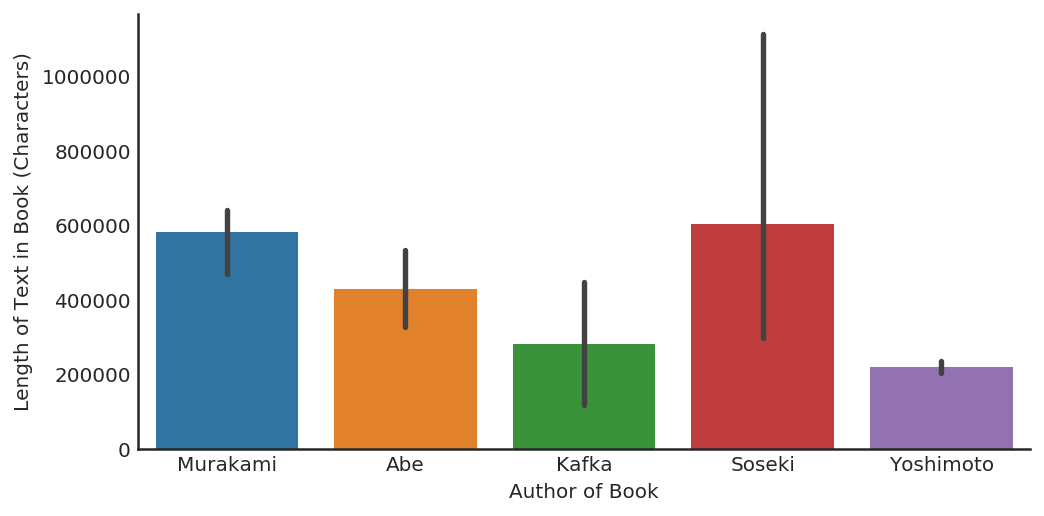

In [4]:
sns.set_style("white")

plt.figure(figsize=(8,4))
sns.barplot(author, text_len)
sns.despine()
plt.ylabel("Length of Text in Book (Characters)")
plt.xlabel("Author of Book")
plt.show()

In [5]:
raw_paths = {'Yoshimoto':PATH_PREFIX+'Banana_Yoshimoto.csv',
             'Kafka':PATH_PREFIX+'Franz_Kafka.csv',
             'Murakami':PATH_PREFIX+'Haruki_Murakami.csv',
             'Abe':PATH_PREFIX+'Kobo_Abe.csv',
             'Soseki':PATH_PREFIX+'Natsume_Soseki.csv'}

all_df = pd.DataFrame()

for path in raw_paths.values():
    all_df = all_df.append(pd.read_csv(path))

In [6]:
sentences = all_df["text"].tolist()

sentences_len = [len(sentence.strip().split(" ")) for sentence in sentences]
avg_len = sum(sentences_len)/len(sentences_len)

print("Average length of sentence:", avg_len)

Average length of sentence: 15.564232907995407
